# Libraries

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import wordnet

# Data set exploration

In [7]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

In [8]:
df_train

,condition_label,medical_abstract
0,5,Tissue changes around loose prostheses. A cani...
1,1,Neuropeptide Y and neuron-specific enolase lev...
2,2,"Sexually transmitted diseases of the colon, re..."
3,1,Lipolytic factors associated with murine and h...
4,3,Does carotid restenosis predict an increased r...
...,...,...
11545,1,Epirubicin at two dose levels with prednisolon...
11546,1,Four and a half year follow up of women with d...
11547,5,Safety of the transbronchial biopsy in outpati...
11548,3,Interictal spikes and hippocampal somatostatin...


In [13]:
df_train["condition_label"].value_counts()/df_train.shape[0]*100

5    33.281385
1    21.904762
4    21.134199
3    13.333333
2    10.346320
Name: condition_label, dtype: float64

In [15]:
df_train.isnull().values.any()

False

In [18]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract))

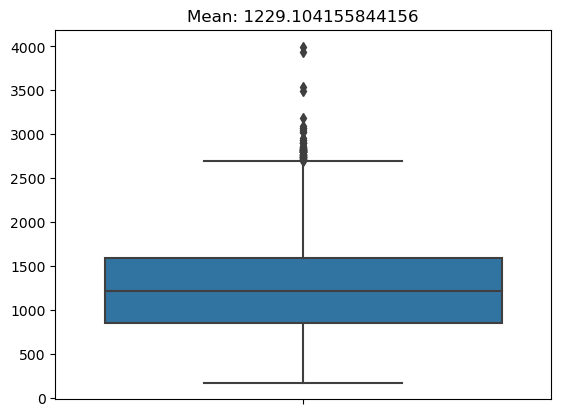

In [21]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [9]:
df_test

,condition_label,medical_abstract
0,3,Obstructive sleep apnea following topical orop...
1,5,Neutrophil function and pyogenic infections in...
2,5,A phase II study of combined methotrexate and ...
3,1,Flow cytometric DNA analysis of parathyroid tu...
4,4,Paraneoplastic vasculitic neuropathy: a treata...
...,...,...
2883,4,Management of aortobronchial fistula with graf...
2884,5,Tuberculous psoas muscle abscess following che...
2885,4,Clinical evaluation of high-frequency (ultraso...
2886,1,Antitumor activity of liposome-encapsulated do...


In [14]:
df_test["condition_label"].value_counts()/df_train.shape[0]*100

5    8.320346
1    5.480519
4    5.281385
3    3.333333
2    2.588745
Name: condition_label, dtype: float64

In [16]:
df_test.isnull().values.any()

False

In [22]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract))

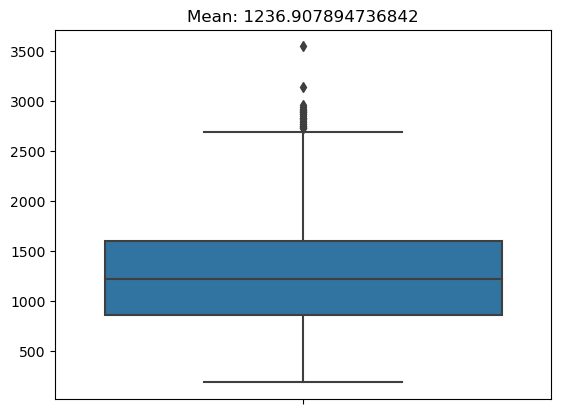

In [23]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [10]:
df_labels

,condition_label,condition_name
0,1,neoplasms
1,2,digestive system diseases
2,3,nervous system diseases
3,4,cardiovascular diseases
4,5,general pathological conditions


# Preprocessing 

In [7]:
df_train = pd.read_csv("./dataset/medical_tc_train.csv")
df_test = pd.read_csv("./dataset/medical_tc_test.csv")
df_labels = pd.read_csv("./dataset/medical_tc_labels.csv")

## Whitespaces

In [24]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines 0
Number of tabs 0
Number of 2 tabs 0
Number of tab and newline 0


In [25]:
count_doubleNl = 0
count_tabs = 0
count_doubleTab = 0
count_tabNewline = 0
for index, row in df_test.iterrows():
    text = row.medical_abstract
    count_doubleNl += text.count('\n\n')
    count_tabs += text.count('\t')
    count_doubleTab += text.count('\t\t')
    count_tabNewline += text.count('\n\t')
print("Number of 2 newlines: ",count_doubleNl)
print("Number of tabs: ",count_tabs)
print("Number of 2 tabs: ",count_doubleTab)
print("Number of tab and newline: ",count_tabNewline)

Number of 2 newlines:  0
Number of tabs:  0
Number of 2 tabs:  0
Number of tab and newline:  0


## Case folding

In [29]:
newAbs = []
for index, row in df_train.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_train.medical_abstract = newAbs

In [30]:
newAbs = []
for index, row in df_test.iterrows():
    text = row.medical_abstract
    newAbs.append(text.lower())
df_test.medical_abstract = newAbs

## Punctuation

In [33]:
list(string.punctuation)

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [34]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_punctuation(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_punctuation(x))

In [35]:
df_train

,condition_label,medical_abstract
0,5,tissue changes around loose prostheses a canin...
1,1,neuropeptide y and neuronspecific enolase leve...
2,2,sexually transmitted diseases of the colon rec...
3,1,lipolytic factors associated with murine and h...
4,3,does carotid restenosis predict an increased r...
...,...,...
11545,1,epirubicin at two dose levels with prednisolon...
11546,1,four and a half year follow up of women with d...
11547,5,safety of the transbronchial biopsy in outpati...
11548,3,interictal spikes and hippocampal somatostatin...


In [36]:
df_test

,condition_label,medical_abstract
0,3,obstructive sleep apnea following topical orop...
1,5,neutrophil function and pyogenic infections in...
2,5,a phase ii study of combined methotrexate and ...
3,1,flow cytometric dna analysis of parathyroid tu...
4,4,paraneoplastic vasculitic neuropathy a treatab...
...,...,...
2883,4,management of aortobronchial fistula with graf...
2884,5,tuberculous psoas muscle abscess following che...
2885,4,clinical evaluation of highfrequency ultrasoni...
2886,1,antitumor activity of liposomeencapsulated dox...


## Numbers

In [37]:
cont_number = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    cont_number += sum(c.isdigit() for c in text)
cont_number

230772

In [39]:
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        print(text)

tissue changes around loose prostheses a canine model to investigate the effects of an antiinflammatory agent the aseptically loosened prosthesis provided a means for investigating the in vivo and in vitro activity of the cells associated with the loosening process in seven dogs the cells were isolated and maintained in culture for sufficient periods of time so that their biologic activity could be studied as well as the effect of different agents added to the cells in vivo or in vitro the biologic response as determined by interleukin1 and prostaglandin e2 activity paralleled the roentgenographic appearance of loosening and the technetium images and observations made at the time of revision surgery the correlation between clinical roentgenographic histologic and biochemical loosening indicates that the canine model is suitable for investigating the mechanisms of prosthetic failure a canine model permits the study of possible nonsurgical therapeutic interventions with the ultimate hope

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [40]:
cont_abs = 0
for index, row in df_train.iterrows():
    text = row.medical_abstract
    if(sum(c.isdigit() for c in text) > 0):
        cont_abs+= 1
cont_abs/df_train.shape[0]*100

82.45887445887445

82% of the training documents contain one number at least. They have high semantic within the context: mac13 tumor, dr4 positive patients

## Remove links

In [45]:
def remove_links(text):
    remove_https = re.sub(r'http\S+', ' ', text)
    remove_com = re.sub(r"www\.[A-Za-z]*\.com", " ", remove_https)
    return remove_com

In [46]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remove_links(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remove_links(x))

In [47]:
df_train

,condition_label,medical_abstract
0,5,tissue changes around loose prostheses a canin...
1,1,neuropeptide y and neuronspecific enolase leve...
2,2,sexually transmitted diseases of the colon rec...
3,1,lipolytic factors associated with murine and h...
4,3,does carotid restenosis predict an increased r...
...,...,...
11545,1,epirubicin at two dose levels with prednisolon...
11546,1,four and a half year follow up of women with d...
11547,5,safety of the transbronchial biopsy in outpati...
11548,3,interictal spikes and hippocampal somatostatin...


## Stop Words

In [57]:
cachedStopWords = stopwords.words("english")

In [58]:
def remSw(text):
    return ' '.join([word for word in text.split() if word not in cachedStopWords])


In [59]:
df_train['medical_abstract'] = df_train['medical_abstract'].apply(lambda x: remSw(x))
df_test['medical_abstract'] = df_test['medical_abstract'].apply(lambda x: remSw(x))

In [60]:
df_train

,condition_label,medical_abstract
0,5,tissue changes around loose prostheses canine ...
1,1,neuropeptide neuronspecific enolase levels ben...
2,2,sexually transmitted diseases colon rectum anu...
3,1,lipolytic factors associated murine human canc...
4,3,carotid restenosis predict increased risk late...
...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...
11546,1,four half year follow women dyskaryotic cervic...
11547,5,safety transbronchial biopsy outpatients objec...
11548,3,interictal spikes hippocampal somatostatin lev...


## Tokenization

In [84]:
def tokenize(text):
    return WordPunctTokenizer().tokenize(text)

In [85]:
df_train['medical_abstract_token'] = df_train['medical_abstract'].apply(lambda x: tokenize(x))
df_test['medical_abstract_token'] = df_test['medical_abstract'].apply(lambda x: tokenize(x))

In [86]:
df_train

,condition_label,medical_abstract,medical_abstract_token
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk..."
...,...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...,"[epirubicin, two, dose, levels, prednisolone, ..."
11546,1,four half year follow women dyskaryotic cervic...,"[four, half, year, follow, women, dyskaryotic,..."
11547,5,safety transbronchial biopsy outpatients objec...,"[safety, transbronchial, biopsy, outpatients, ..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin..."


## POS Tagging

In [92]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [95]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\lucmi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [96]:
def pos(tokens):
    return nltk.pos_tag(tokens, tagset='universal')

In [97]:
df_train['medical_abstract_pos'] = df_train['medical_abstract_token'].apply(lambda x: pos(x))
df_test['medical_abstract_pos'] = df_test['medical_abstract_token'].apply(lambda x: pos(x))

In [98]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict..."
...,...,...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...,"[epirubicin, two, dose, levels, prednisolone, ...","[(epirubicin, ADV), (two, NUM), (dose, ADJ), (..."
11546,1,four half year follow women dyskaryotic cervic...,"[four, half, year, follow, women, dyskaryotic,...","[(four, NUM), (half, NOUN), (year, NOUN), (fol..."
11547,5,safety transbronchial biopsy outpatients objec...,"[safety, transbronchial, biopsy, outpatients, ...","[(safety, NOUN), (transbronchial, ADJ), (biops..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp..."


## Lemmatization

In [112]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

def lemmatize_sentence(tagged_sentence):
    lemmatized_sentence = []
    for word, tag in tagged_sentence:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            if(get_wordnet_pos(tag) != ''):
                lemmatized_sentence.append(lemmatizer.lemmatize(word, get_wordnet_pos(tag)))
            else:
                lemmatized_sentence.append(word)
    return lemmatized_sentence

In [113]:
df_train['medical_abstract_lemma_token'] = df_train['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))
df_test['medical_abstract_lemma_token'] = df_test['medical_abstract_pos'].apply(lambda x: lemmatize_sentence(x))

In [114]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP...","[tissue, change, around, loose, prosthesis, ca..."
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (...","[neuropeptide, neuronspecific, enolase, level,..."
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas...","[sexually, transmit, disease, colon, rectum, a..."
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate...","[lipolytic, factor, associate, murine, human, ..."
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict...","[carotid, restenosis, predict, increase, risk,..."
...,...,...,...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...,"[epirubicin, two, dose, levels, prednisolone, ...","[(epirubicin, ADV), (two, NUM), (dose, ADJ), (...","[epirubicin, two, dose, level, prednisolone, t..."
11546,1,four half year follow women dyskaryotic cervic...,"[four, half, year, follow, women, dyskaryotic,...","[(four, NUM), (half, NOUN), (year, NOUN), (fol...","[four, half, year, follow, woman, dyskaryotic,..."
11547,5,safety transbronchial biopsy outpatients objec...,"[safety, transbronchial, biopsy, outpatients, ...","[(safety, NOUN), (transbronchial, ADJ), (biops...","[safety, transbronchial, biopsy, outpatient, o..."
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp...","[interictal, spike, hippocampal, somatostatin,..."


## Merge processed tokens

In [115]:
def merge(tokens):
    return " ".join(tokens)

In [116]:
df_train['medical_abstract_lemma'] = df_train['medical_abstract_lemma_token'].apply(lambda x: merge(x))
df_test['medical_abstract_lemma'] = df_test['medical_abstract_lemma_token'].apply(lambda x: merge(x))

In [117]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"[tissue, changes, around, loose, prostheses, c...","[(tissue, NOUN), (changes, NOUN), (around, ADP...","[tissue, change, around, loose, prosthesis, ca...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"[neuropeptide, neuronspecific, enolase, levels...","[(neuropeptide, ADV), (neuronspecific, ADJ), (...","[neuropeptide, neuronspecific, enolase, level,...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"[sexually, transmitted, diseases, colon, rectu...","[(sexually, ADV), (transmitted, VERB), (diseas...","[sexually, transmit, disease, colon, rectum, a...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"[lipolytic, factors, associated, murine, human...","[(lipolytic, ADJ), (factors, NOUN), (associate...","[lipolytic, factor, associate, murine, human, ...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"[carotid, restenosis, predict, increased, risk...","[(carotid, NOUN), (restenosis, NOUN), (predict...","[carotid, restenosis, predict, increase, risk,...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...,"[epirubicin, two, dose, levels, prednisolone, ...","[(epirubicin, ADV), (two, NUM), (dose, ADJ), (...","[epirubicin, two, dose, level, prednisolone, t...",epirubicin two dose level prednisolone treatme...
11546,1,four half year follow women dyskaryotic cervic...,"[four, half, year, follow, women, dyskaryotic,...","[(four, NUM), (half, NOUN), (year, NOUN), (fol...","[four, half, year, follow, woman, dyskaryotic,...",four half year follow woman dyskaryotic cervic...
11547,5,safety transbronchial biopsy outpatients objec...,"[safety, transbronchial, biopsy, outpatients, ...","[(safety, NOUN), (transbronchial, ADJ), (biops...","[safety, transbronchial, biopsy, outpatient, o...",safety transbronchial biopsy outpatient object...
11548,3,interictal spikes hippocampal somatostatin lev...,"[interictal, spikes, hippocampal, somatostatin...","[(interictal, ADJ), (spikes, NOUN), (hippocamp...","[interictal, spike, hippocampal, somatostatin,...",interictal spike hippocampal somatostatin leve...


In [118]:
df_test

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,3,obstructive sleep apnea following topical orop...,"[obstructive, sleep, apnea, following, topical...","[(obstructive, ADJ), (sleep, ADJ), (apnea, NOU...","[obstructive, sleep, apnea, follow, topical, o...",obstructive sleep apnea follow topical orophar...
1,5,neutrophil function pyogenic infections bone m...,"[neutrophil, function, pyogenic, infections, b...","[(neutrophil, ADJ), (function, NOUN), (pyogeni...","[neutrophil, function, pyogenic, infection, bo...",neutrophil function pyogenic infection bone ma...
2,5,phase ii study combined methotrexate teniposid...,"[phase, ii, study, combined, methotrexate, ten...","[(phase, NOUN), (ii, NOUN), (study, NOUN), (co...","[phase, ii, study, combine, methotrexate, teni...",phase ii study combine methotrexate teniposide...
3,1,flow cytometric dna analysis parathyroid tumor...,"[flow, cytometric, dna, analysis, parathyroid,...","[(flow, NOUN), (cytometric, NOUN), (dna, NOUN)...","[flow, cytometric, dna, analysis, parathyroid,...",flow cytometric dna analysis parathyroid tumor...
4,4,paraneoplastic vasculitic neuropathy treatable...,"[paraneoplastic, vasculitic, neuropathy, treat...","[(paraneoplastic, ADJ), (vasculitic, ADJ), (ne...","[paraneoplastic, vasculitic, neuropathy, treat...",paraneoplastic vasculitic neuropathy treatable...
...,...,...,...,...,...,...
2883,4,management aortobronchial fistula graft replac...,"[management, aortobronchial, fistula, graft, r...","[(management, NOUN), (aortobronchial, ADJ), (f...","[management, aortobronchial, fistula, graft, r...",management aortobronchial fistula graft replac...
2884,5,tuberculous psoas muscle abscess following che...,"[tuberculous, psoas, muscle, abscess, followin...","[(tuberculous, ADJ), (psoas, NOUN), (muscle, N...","[tuberculous, psoas, muscle, abscess, follow, ...",tuberculous psoas muscle abscess follow chemop...
2885,4,clinical evaluation highfrequency ultrasonic m...,"[clinical, evaluation, highfrequency, ultrason...","[(clinical, ADJ), (evaluation, NOUN), (highfre...","[clinical, evaluation, highfrequency, ultrason...",clinical evaluation highfrequency ultrasonic m...
2886,1,antitumor activity liposomeencapsulated doxoru...,"[antitumor, activity, liposomeencapsulated, do...","[(antitumor, NOUN), (activity, NOUN), (liposom...","[antitumor, activity, liposomeencapsulated, do...",antitumor activity liposomeencapsulated doxoru...


## Save preprocessed dataframes

In [119]:
df_train.to_csv("./dataset/medical_tc_train_preprocessed.csv")
df_test.to_csv("./dataset/medical_tc_test_preprocessed.csv")

In [120]:
len_abstracts = []
for index, row in df_train.iterrows():
    len_abstracts.append(len(row.medical_abstract_lemma))

From 1229 and 1236 to 917 and 922

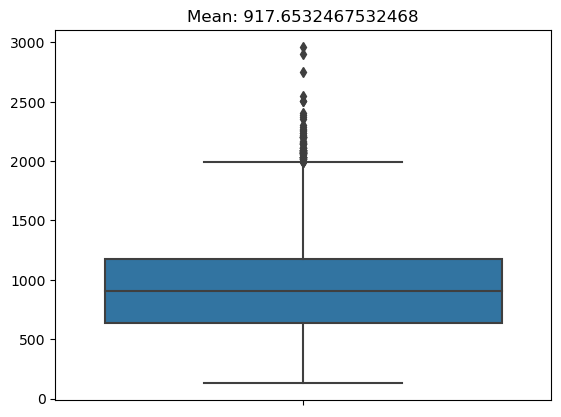

In [121]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

In [122]:
len_abstracts = []
for index, row in df_test.iterrows():
    len_abstracts.append(len(row.medical_abstract_lemma))

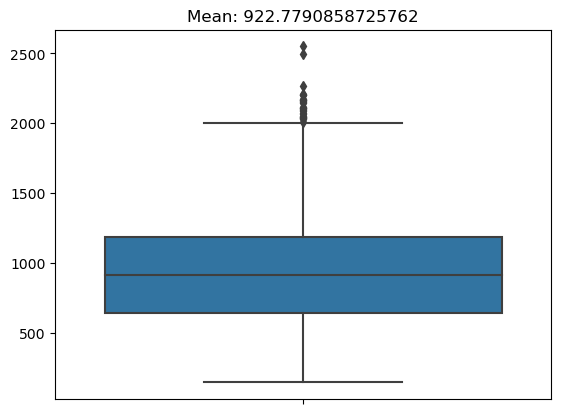

In [123]:
sns.boxplot( y=len_abstracts);
plt.title("Mean: " + str(np.mean(len_abstracts)))
plt.show()

# Document representation

Dalle slide, parla nello specifico per la classificazione, mentre per il clustering non dice nulla di particolare:
1. Feature extraction
    - Per la classificazione by topic (la nostra) il modo più semplice è fare un BoW (es. TF-IDF).
    - Altra opzione: N-gram.
    - Altra opzione: word embeddings (Word2Vec, GloVe, and FastText). La SVD non è suggerita.
    - Altra opzione: contextualized word embeddings (BERT) che richiede pre-processing aggiuntivi (vedi slide).
    
2. Feature selection/Synthesis
    - Synthesis (PCA, SVD, LSA) --> non lo facciamo se si usa un word embedding!!!
    
3. Feature weighting
    - Skippabile



Io direi di provare due diverse rappresentazioni: un word embedding classico (Glove) e uno contextualized (BERT)
Bert requisiti:
- Special tokens: Add [CLS] and [SEP] tokens at the beginning and end of each text for BERT-style models.
- Padding: Ensure that all sequences are of the same length by padding or truncating as needed.

In [126]:
df_train = pd.read_csv("./dataset/medical_tc_train_preprocessed.csv", index_col = 0)
df_test = pd.read_csv("./dataset/medical_tc_test_preprocessed.csv", index_col = 0)

In [127]:
df_train

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,5,tissue changes around loose prostheses canine ...,"['tissue', 'changes', 'around', 'loose', 'pros...","[('tissue', 'NOUN'), ('changes', 'NOUN'), ('ar...","['tissue', 'change', 'around', 'loose', 'prost...",tissue change around loose prosthesis canine m...
1,1,neuropeptide neuronspecific enolase levels ben...,"['neuropeptide', 'neuronspecific', 'enolase', ...","[('neuropeptide', 'ADV'), ('neuronspecific', '...","['neuropeptide', 'neuronspecific', 'enolase', ...",neuropeptide neuronspecific enolase level beni...
2,2,sexually transmitted diseases colon rectum anu...,"['sexually', 'transmitted', 'diseases', 'colon...","[('sexually', 'ADV'), ('transmitted', 'VERB'),...","['sexually', 'transmit', 'disease', 'colon', '...",sexually transmit disease colon rectum anus ch...
3,1,lipolytic factors associated murine human canc...,"['lipolytic', 'factors', 'associated', 'murine...","[('lipolytic', 'ADJ'), ('factors', 'NOUN'), ('...","['lipolytic', 'factor', 'associate', 'murine',...",lipolytic factor associate murine human cancer...
4,3,carotid restenosis predict increased risk late...,"['carotid', 'restenosis', 'predict', 'increase...","[('carotid', 'NOUN'), ('restenosis', 'NOUN'), ...","['carotid', 'restenosis', 'predict', 'increase...",carotid restenosis predict increase risk late ...
...,...,...,...,...,...,...
11545,1,epirubicin two dose levels prednisolone treatm...,"['epirubicin', 'two', 'dose', 'levels', 'predn...","[('epirubicin', 'ADV'), ('two', 'NUM'), ('dose...","['epirubicin', 'two', 'dose', 'level', 'predni...",epirubicin two dose level prednisolone treatme...
11546,1,four half year follow women dyskaryotic cervic...,"['four', 'half', 'year', 'follow', 'women', 'd...","[('four', 'NUM'), ('half', 'NOUN'), ('year', '...","['four', 'half', 'year', 'follow', 'woman', 'd...",four half year follow woman dyskaryotic cervic...
11547,5,safety transbronchial biopsy outpatients objec...,"['safety', 'transbronchial', 'biopsy', 'outpat...","[('safety', 'NOUN'), ('transbronchial', 'ADJ')...","['safety', 'transbronchial', 'biopsy', 'outpat...",safety transbronchial biopsy outpatient object...
11548,3,interictal spikes hippocampal somatostatin lev...,"['interictal', 'spikes', 'hippocampal', 'somat...","[('interictal', 'ADJ'), ('spikes', 'NOUN'), ('...","['interictal', 'spike', 'hippocampal', 'somato...",interictal spike hippocampal somatostatin leve...


In [128]:
df_test

,condition_label,medical_abstract,medical_abstract_token,medical_abstract_pos,medical_abstract_lemma_token,medical_abstract_lemma
0,3,obstructive sleep apnea following topical orop...,"['obstructive', 'sleep', 'apnea', 'following',...","[('obstructive', 'ADJ'), ('sleep', 'ADJ'), ('a...","['obstructive', 'sleep', 'apnea', 'follow', 't...",obstructive sleep apnea follow topical orophar...
1,5,neutrophil function pyogenic infections bone m...,"['neutrophil', 'function', 'pyogenic', 'infect...","[('neutrophil', 'ADJ'), ('function', 'NOUN'), ...","['neutrophil', 'function', 'pyogenic', 'infect...",neutrophil function pyogenic infection bone ma...
2,5,phase ii study combined methotrexate teniposid...,"['phase', 'ii', 'study', 'combined', 'methotre...","[('phase', 'NOUN'), ('ii', 'NOUN'), ('study', ...","['phase', 'ii', 'study', 'combine', 'methotrex...",phase ii study combine methotrexate teniposide...
3,1,flow cytometric dna analysis parathyroid tumor...,"['flow', 'cytometric', 'dna', 'analysis', 'par...","[('flow', 'NOUN'), ('cytometric', 'NOUN'), ('d...","['flow', 'cytometric', 'dna', 'analysis', 'par...",flow cytometric dna analysis parathyroid tumor...
4,4,paraneoplastic vasculitic neuropathy treatable...,"['paraneoplastic', 'vasculitic', 'neuropathy',...","[('paraneoplastic', 'ADJ'), ('vasculitic', 'AD...","['paraneoplastic', 'vasculitic', 'neuropathy',...",paraneoplastic vasculitic neuropathy treatable...
...,...,...,...,...,...,...
2883,4,management aortobronchial fistula graft replac...,"['management', 'aortobronchial', 'fistula', 'g...","[('management', 'NOUN'), ('aortobronchial', 'A...","['management', 'aortobronchial', 'fistula', 'g...",management aortobronchial fistula graft replac...
2884,5,tuberculous psoas muscle abscess following che...,"['tuberculous', 'psoas', 'muscle', 'abscess', ...","[('tuberculous', 'ADJ'), ('psoas', 'NOUN'), ('...","['tuberculous', 'psoas', 'muscle', 'abscess', ...",tuberculous psoas muscle abscess follow chemop...
2885,4,clinical evaluation highfrequency ultrasonic m...,"['clinical', 'evaluation', 'highfrequency', 'u...","[('clinical', 'ADJ'), ('evaluation', 'NOUN'), ...","['clinical', 'evaluation', 'highfrequency', 'u...",clinical evaluation highfrequency ultrasonic m...
2886,1,antitumor activity liposomeencapsulated doxoru...,"['antitumor', 'activity', 'liposomeencapsulate...","[('antitumor', 'NOUN'), ('activity', 'NOUN'), ...","['antitumor', 'activity', 'liposomeencapsulate...",antitumor activity liposomeencapsulated doxoru...


## GLOVE

## BERT

# Classification

# Clustering